In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

url = "https://raw.githubusercontent.com/ValentineKornel/MMO/refs/heads/master/diabetes.csv"
data = pd.read_csv(url)
data.head()
data.dtypes

y = data["Outcome"];
X = data.drop("Outcome", axis=1)

X.shape, y.shape


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17)

X_train.shape, X_valid.shape

y_train.shape, y_valid.shape


log_reg1 = LogisticRegression(max_iter=1000)

log_reg1.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(log_reg1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(log_reg1.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.78
Правильность на тестовом наборе: 0.79


In [ ]:
log_reg2 = LogisticRegression(C=100, max_iter=1000)

log_reg2.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(log_reg2.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(log_reg2.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.78
Правильность на тестовом наборе: 0.79


In [ ]:
log_reg2_pred = log_reg2.predict(X_valid)
cm = confusion_matrix(y_valid, log_reg2_pred)

TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(cm, '\n\n', accuracy, precision, recall)

[[136  14]
 [ 35  46]] 

 0.7878787878787878 0.9066666666666666 0.7953216374269005


In [ ]:
log_reg3 = LogisticRegression(C=0.01, max_iter=1000)

log_reg3.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(log_reg3.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(log_reg3.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.77
Правильность на тестовом наборе: 0.77


In [ ]:
log_reg4 = LogisticRegression(penalty='l1', C=100, max_iter=1000, solver='liblinear')

log_reg4.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(log_reg4.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(log_reg4.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.78
Правильность на тестовом наборе: 0.79


In [ ]:
log_reg5 = LogisticRegression(penalty='l2', C=0.01, max_iter=1000, solver='liblinear')

log_reg5.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(log_reg5.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(log_reg5.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.70
Правильность на тестовом наборе: 0.70


In [ ]:
svc_model1 = SVC()

svc_model1.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(svc_model1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(svc_model1.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.77
Правильность на тестовом наборе: 0.74


In [ ]:
svc_model2 = SVC()

param_grid = {
    'C': [0.1, 0.5, 1, 10],
    'gamma': [0.001, 0.1, 0.5, 1, 10]
}
SVC_grid = GridSearchCV(svc_model2, param_grid, cv=5, n_jobs=-1)
SVC_grid.fit(X_train, y_train)

SVC_grid.best_score_, SVC_grid.best_params_

(np.float64(0.7374870197300103), {'C': 1, 'gamma': 0.001})

In [ ]:
best_svc = SVC_grid.best_estimator_

print("Правильность на обучающем наборе: {:.2f}".format(best_svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(best_svc.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.85
Правильность на тестовом наборе: 0.73


In [ ]:
best_svc_pred = log_reg2.predict(X_valid)
cm = confusion_matrix(y_valid, best_svc_pred)

TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(cm, '\n\n', accuracy, precision, recall)

[[136  14]
 [ 35  46]] 

 0.7878787878787878 0.9066666666666666 0.7953216374269005


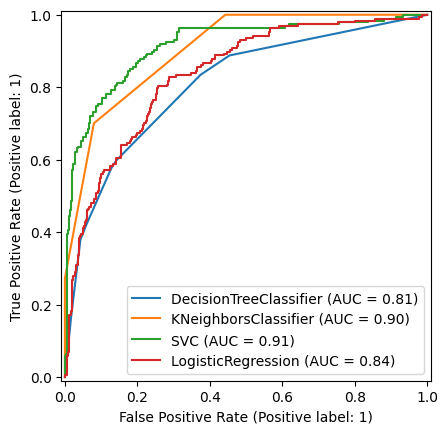

In [ ]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
    'max_features': [0.5, 0.7, 1]
}

treeGrid = GridSearchCV(first_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
treeGrid.fit(X_train, y_train)
treeGrid.best_score_, treeGrid.best_params_
best_tree = treeGrid.best_estimator_

first_knn = KNeighborsClassifier(n_neighbors=3)
first_knn.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(best_tree, X_train, y_train, ax=ax)
rfc_disp = RocCurveDisplay.from_estimator(first_knn, X_train, y_train, ax=ax)
rfc_disp = RocCurveDisplay.from_estimator(best_svc, X_train, y_train, ax=ax)
rfc_disp = RocCurveDisplay.from_estimator(log_reg2, X_train, y_train, ax=ax)
plt.show()
